## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

from seaborn import plt
from itertools import product

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam_data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,0.104553,0.305358,0,0.000,0.000,0.000,4.540
word_freq_address,4601,0.213015,1.290575,0,0.000,0.000,0.000,14.280
word_freq_all,4601,0.280656,0.504143,0,0.000,0.000,0.420,5.100
word_freq_3d,4601,0.065425,1.395151,0,0.000,0.000,0.000,42.810
word_freq_our,4601,0.312223,0.672513,0,0.000,0.000,0.380,10.000
word_freq_over,4601,0.095901,0.273824,0,0.000,0.000,0.000,5.880
word_freq_remove,4601,0.114208,0.391441,0,0.000,0.000,0.000,7.270
word_freq_internet,4601,0.105295,0.401071,0,0.000,0.000,0.000,11.110
word_freq_order,4601,0.090067,0.278616,0,0.000,0.000,0.000,5.260
word_freq_mail,4601,0.239413,0.644755,0,0.000,0.000,0.160,18.180


In [4]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [5]:
# Let's see how many are actually spam
spam_data['is_spam'].value_counts()

0    2788
1    1813
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10387eb10>]], dtype=object)

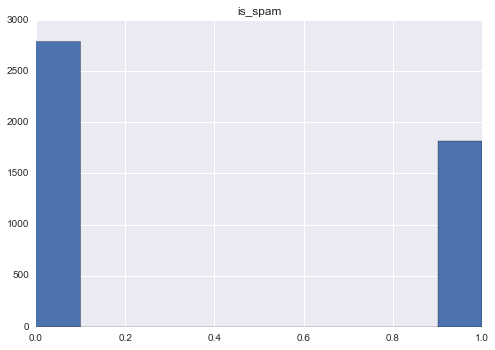

In [6]:
spam_data.hist(column='is_spam')

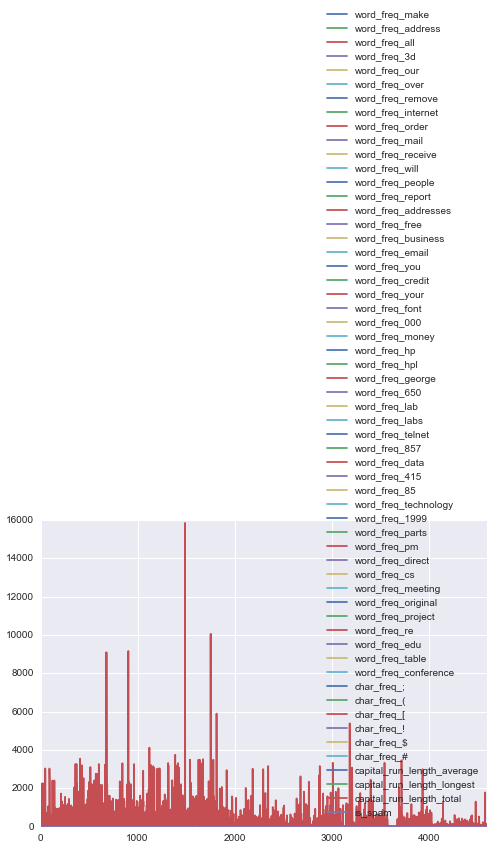

In [7]:
spam_data.plot()

In [11]:
#sns.pairplot(spam_data, size = 1.2, aspect=1.75)

In [121]:
#spam_data['word_freq_make'].value_counts()

In [122]:
#from sklearn.preprocessing import scale

In [123]:
#df_norm = pd.DataFrame(scale(spam_data))

In [125]:
#df_norm.head()

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

Here yi = Prob(email is_spam i = 1) on var capital_run_length_longest in the data

In [8]:
spam_data.columns[55]

'capital_run_length_longest'

In [9]:
train_col = spam_data.columns[55]

In [10]:
logit = smf.Logit(spam_data["is_spam"], spam_data[train_col])

In [11]:
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.661246
         Iterations 7


In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4600
Method:                           MLE   Df Model:                            0
Date:                Tue, 10 Mar 2015   Pseudo R-squ.:                 0.01384
Time:                        14:21:41   Log-Likelihood:                -3042.4
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                       nan
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
capital_run_length_longest     0.0069      0.001     12.155      0.000         0.006     0.008
==============================================================================================
"""

In [37]:
# Is the coefficient significant? 
# Yes, p value for "capital_run_length_longest" < 0.05

In [13]:
results.pvalues

capital_run_length_longest    5.377599e-34
dtype: float64

In [14]:
results.params

capital_run_length_longest    0.006926
dtype: float64

???Above event is impossible since we have P = 0. So we cannot use capital_run_length_longest to predict spam. Also, since our Pseudo R-Square is 0.01384, i.e. very close 0%, the model above explains almost none of the variability of the response data around its mean???

In [35]:
x = train_col

In [36]:
x

'capital_run_length_longest'

In [89]:
type(x)

numpy.ndarray

In [114]:
#Visualization

In [119]:
#x.plot(kind = 'scatter')

In [95]:
type(spam_data.is_spam)

pandas.core.series.Series

In [118]:
#plt.scatter(x)
#plt.ylabel('some numbers')
#plt.show()

In [117]:
#df = spam_data(columns=[55])

#df.plot(kind='scatter', x='capital_run_length_longest', y='is_spam')

(array([  4.58100000e+03,   1.70000000e+01,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   9.99800000e+02,   1.99860000e+03,
          2.99740000e+03,   3.99620000e+03,   4.99500000e+03,
          5.99380000e+03,   6.99260000e+03,   7.99140000e+03,
          8.99020000e+03,   9.98900000e+03]),
 <a list of 10 Patch objects>)

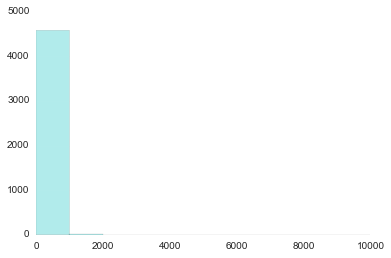

In [80]:
plt.hist(spam_data.capital_run_length_longest, color = 'c', alpha=.3)

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [56]:
# Get a list of Feature Columns
feature_cols = [col for col in spam_data.columns]
print feature_cols

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [99]:
# Create the X Matrix (of features)
X = spam_data[feature_cols]


In [100]:
# Target vector
y = spam_data[:]
y

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.00,0.43,0.43,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.07,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.00,1.16,0.06,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.06,0.00,0.00,0.12,0.00,0.06,0.06,0.00,0,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.00,0.00,0.15,0.00,0,0,0.00,0.00,0.00,0.00,0,0.15,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.00,0.19,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [59]:
# Split the data to train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [101]:
# Get a list of Feature Columns
feature_cols = [col for col in spam_data.columns if col != 'capital_run_length_longest']
print feature_cols

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [102]:
# Create the X Matrix (of features)
X = spam_data[feature_cols]

In [103]:
# Target vector
y = spam_data['capital_run_length_longest']

In [45]:
# Split the data to train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [110]:
# Do a KNN with Three Class levels
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [116]:
# Show accuracy
#clf.score(X_test, y_test)

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [ ]:
sns.pairplot(x, size = 1.2, aspect=1.75)

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [8]:
#your code here

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [9]:
#Your code here

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [10]:
#your discussion here

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [11]:
#your code here

In [12]:
#your visualization here